In [ ]:
# This file is for plotting "time(normalized)"-"mean Th" graph from test_action.csv

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

actions = pd.read_csv('action_my_agent_409000_28000trial.csv')

In [3]:
trial_result = {}
for task in range(actions.task.max()+1):
    for trial in range(actions.trial.max()+1):
        trial_result[(task, trial)] = actions.loc[(actions['task'] == task) & (actions['trial']==trial), ['time', 'th']].to_numpy()

In [4]:
for task in range(actions.task.max()+1):
    for trial in range(actions.trial.max()+1):
        if len(trial_result[(task,trial)]) != 0:
            scaler = MinMaxScaler()
            trial_result[(task,trial)][:, 0] = scaler.fit_transform(trial_result[(task,trial)][:, 0].reshape([-1,1])).flatten()

In [5]:
total_result = np.array([[]])
total_result = total_result.reshape([-1,2])
for task in range(actions.task.max()+1):
    for trial in range(actions.trial.max()+1):
        total_result = np.append(total_result, trial_result[(task,trial)], 0)

In [19]:
# for grouping similar values like 0.9999999... and 1
total_result[:, 0] = np.round(total_result[:, 0], 3)

In [20]:
unqa,ID,counts = np.unique(total_result[:,0],return_inverse=True,return_counts=True)
out = np.column_stack((unqa , np.bincount(ID,total_result[:,1])/counts ))

In [21]:
out

array([[0.        , 1.01063929],
       [0.017     , 0.8       ],
       [0.021     , 1.8       ],
       ...,
       [0.979     , 0.4       ],
       [0.983     , 0.4       ],
       [1.        , 0.23695452]])

In [22]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

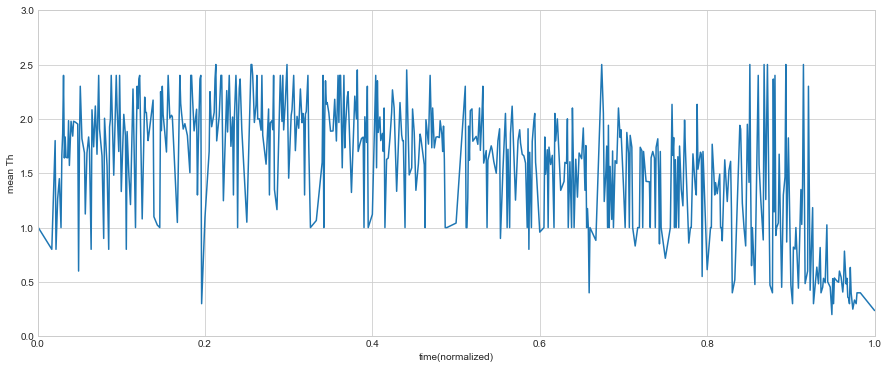

In [25]:
fig = plt.figure(figsize=(15,6))
ax = plt.axes()
plt.xlim(0, 1)
plt.ylim(0, 3)
plt.xlabel('time(normalized)')
plt.ylabel('mean Th')

ax.plot(out[:,0], out[:,1])